# Интересное про python

## Скорость Numpy

NDArray работает в разы быстрее благодаря способу хранения информации

In [ ]:
import pandas as pd

In [ ]:
a = [1, 2, 3, 300]

for i in range(len(a)-1):

    print(i, id(a[i]))
    print(i+1, id(a[i+1]))
    print('delta', id(a[i+1]) - id(a[i]))
    print('--')

Python использует хитрые оптимизации и кэширует целые числа от -5 до 256 в **непрерывной** области памяти

In [ ]:
id(256) - id(0), id(257) - id(0)

При повторном вызове строчки выше, мы получим другое значение во втором элементе ответа, так как python заново создаст объект 257 где-то в куче и расстояние между ним и объектом 0 уже будет другое

In [ ]:
id(256) - id(0), id(257) - id(0)

## display()

In [ ]:
a = [1, 2, 3]
b = a
del a
print(b)
# print(a)

In [ ]:
a = [1, 2, 3]
b = a
b[0] = 10
print(a)

In [ ]:
a = [1, 2, 3]
b = a[:]
b[0] = 10
print(a)

In [ ]:
a = [2, 4, 6]
a

In [ ]:
a

In [ ]:
# Обновляем куда указывает имя "a", по хорошему старые данные должны затереться
a = [3, 5, 7]

In [ ]:
# Так как в IPython есть специальный массив куда сказываются аутпуты ячеек,
# то старое содержимое "a" никуда не делось и всё равно весит в памяти
# Out[144]

In [ ]:
df = pd.DataFrame()

In [ ]:
df

In [ ]:
# df.drop(colums=['a'], inplace=True)

In [ ]:
display([1, 2, 3])

# Урок 3. Классификация

In [ ]:
import numpy as np
import pandas as pd

## Смотрим на данные

In [ ]:
# Качаем данные
# !gdown 1nCHCT5XWio5fSN0mYNwRbEzTGL_sIcN4

Датасет заявок на кредит с информацией о клиента и флагом одобрение или отказ по заявке

In [ ]:
#Считываем скачанный csv файл
df = pd.read_csv('loan_data.csv')

In [ ]:
# Посмотрим на него
display(df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Заведём константу, чтобы каждый раз не вспоминать как называется колонка с таргетом
TARGET = 'loan_status'

In [ ]:
# Посмотрим на пропуски
df.isna().sum()

In [ ]:
df['age_bin'] = df['person_age'] #//6

In [ ]:
# Посмотрим на распределение среднего дохода в зависимости от возраста
df[df['person_age'] < 80].groupby('age_bin')['person_income'].mean().plot()

In [ ]:
df['age_bin'] = df['person_age'] // 6
df[df['person_age'] < 80].groupby('age_bin')['person_income'].mean().plot()

Пропусков нет - скучно :(

In [ ]:
from numpy import random
# зашумим часть данных для дальнейшего интереса :-)

# Зашумим случаный 1000 возрастов (может быть меньше с учетом коллизий индексов)
# Это даст нам случайное распределение пустот
df.loc[random.choice(range(df.shape[0]), 1000), 'person_age'] = np.nan

# Уберём значительную часть доходов у людей, которые хотят взять кредит на образование
# Это зашумление нам даст неслучайное смещение
df.loc[df[df['loan_intent'] == 'EDUCATION'].sample(3000).index, 'person_income'] = np.nan

In [ ]:
df.isna().sum()


In [ ]:
# Проверим гипотезы про случайность/неслучайность получившихся пустот

print('Target rate all:', df[TARGET].mean())

print('--'*20)

print('Target rate income null:', df[df['person_income'].isna()][TARGET].mean())
print('Target rate income not null:', df[df['person_income'].notna()][TARGET].mean())

print('--'*20)

print('Target rate age null:', df[df['person_age'].isna()][TARGET].mean())
print('Target rate age not null:', df[df['person_age'].notna()][TARGET].mean())

## Попробуем обучить LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Разобъем на тренировочную и тестовую выборки
train, test = train_test_split(df, test_size=0.25, random_state=43)

In [ ]:
# Для простоты возьмём несколько числовых колонок в качестве факторов
features = ['loan_amnt', 'loan_int_rate'] # loan_amnt - сумма кредита, loan_int_rate - процентная ставка

In [ ]:
X_train = train[features]
y_train = train[TARGET] #loan status - статус кредита (наш таргет)

X_test = test[features]
y_test = test[TARGET]

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
def least_squared_estimator(X, y, learn_intercept=False):
  X = np.array(X)
  if learn_intercept:
    X = np.concatenate([np.ones((X.shape[0], 1), ), X ], axis=1)
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
  return coefs

In [ ]:
coefs = least_squared_estimator(X_train, y_train, learn_intercept=True)
f = lambda x: coefs[0] + coefs[1] * x[:, 0] + coefs[2] * x[:, 1]

print(f)

In [ ]:
coefs

In [ ]:
train['predict'] = lr.predict(X_train)
test['predict'] = lr.predict(X_test)


train['predict_proba'] = lr.predict_proba(X_train)[:, 1]
test['predict_proba'] = lr.predict_proba(X_test)[:, 1]

In [ ]:
train['predict_naive'] = f(X_train.values)
test['predict_naive'] = f(X_test.values)

In [ ]:
import matplotlib as mpl

train_sample = train.sample(2500)
test_sample = test.sample(2500)

print(train_sample)

Посмотрим как мы попали на Train

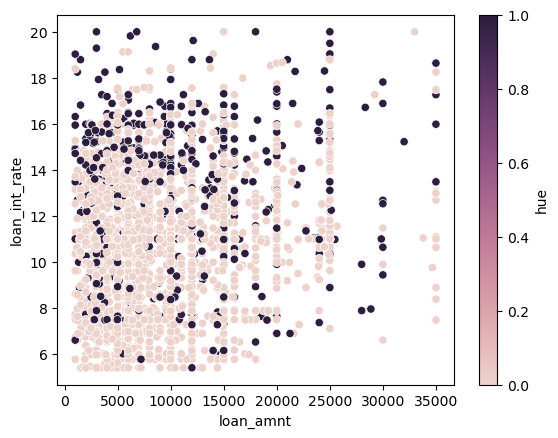

In [ ]:
cmap = sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue=TARGET, hue_norm=sm.norm, palette= cmap, legend= False)
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
#плохой способ, predict 0,5
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='predict', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
#хороший способ, порог настраиваем сами
train_sample['new_predict'] = (train_sample['predict_proba'] > 0.44).astype(int)
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='new_predict', hue_norm=sm.norm, palette= cmap, legend= False)
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
#градиент цвета, норм подход
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='predict_proba', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
#наивный подход 
train_sample['new_predict'] = (train_sample['predict_naive'] > 0.1).astype(int)
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='new_predict', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

Посмотрим как мы попали на Test

In [ ]:
cmap = sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=test_sample, x='loan_amnt', y='loan_int_rate', hue=TARGET, hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=test_sample, x='loan_amnt', y='loan_int_rate', hue='predict', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=test_sample, x='loan_amnt', y='loan_int_rate', hue='predict_proba', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

### Посчитаем Метрики

In [ ]:
# Для начала заимпортим их
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Нарисуем Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(train[TARGET], train['predict'])).plot()

Верхняя левая (25494):
Истинный класс: 0
Предсказанный класс: 0
Значение: Это количество объектов, которые на самом деле относятся к классу 0, и модель правильно предсказала их как класс 0. Это Истинно Отрицательные (True Negatives, TN). Модель молодец.

Верхняя правая (717):
Истинный класс: 0
Предсказанный класс: 1
Значение: Это количество объектов, которые на самом деле относятся к классу 0, но модель ошибочно предсказала их как класс 1. Это Ложно Положительные (False Positives, FP), или "ошибка I рода". Модель ошиблась.

Нижняя левая (6300):
Истинный класс: 1
Предсказанный класс: 0
Значение: Это количество объектов, которые на самом деле относятся к классу 1, но модель ошибочно предсказала их как класс 0. Это Ложно Отрицательные (False Negatives, FN), или "ошибка II рода". Модель ошиблась (возможно, это самая критичная ошибка, если класс 1 - это что-то важное, например, болезнь).

Нижняя правая (1239):
Истинный класс: 1
Предсказанный класс: 1
Значение: Это количество объектов, которые на самом деле относятся к классу 1, и модель правильно предсказала их как класс 1. Это Истинно Положительные (True Positives, TP). Модель молодец.

In [ ]:
# train
accuracy_score(train[TARGET], train['predict'])

In [ ]:
# train
accuracy_score(train[TARGET], [0] * train.shape[0])

In [ ]:
# test
accuracy_score(test[TARGET], test['predict'])

In [ ]:
accuracy_score(train[TARGET], (train['predict_proba'] > 0.44).astype(int))

In [ ]:
# train
precision_score(train[TARGET], train['predict'])

In [ ]:
# test
precision_score(test[TARGET], test['predict'])

In [ ]:
# train
recall_score(train[TARGET], train['predict'])

In [ ]:
# test
recall_score(test[TARGET], test['predict'])

In [ ]:
# train
roc_auc_score(train[TARGET], train['predict'])

In [ ]:
# test
roc_auc_score(test[TARGET], test['predict'])

In [ ]:
# train
roc_auc_score(train[TARGET], train['predict_proba'])

In [ ]:
# test
roc_auc_score(test[TARGET], test['predict_proba'])

In [ ]:
roc_auc_score(train[TARGET], train['predict_naive'])

In [ ]:
roc_auc_score(test[TARGET], test['predict_naive'])

In [ ]:
from tqdm.auto import tqdm
stats = []
for threshold in tqdm(np.linspace(0.01, 1, 100)):
    stats.append({
        'threshold': threshold,
        'accuracy': accuracy_score(train[TARGET], (train['predict_proba'] > threshold).astype(int)),
        'accuracy_naive': accuracy_score(train[TARGET], (train['predict_naive'] > threshold).astype(int)),
        'precision': precision_score(train[TARGET], (train['predict_proba'] > threshold).astype(int), zero_division=0),
        'precision_naive': precision_score(train[TARGET], (train['predict_naive'] > threshold).astype(int), zero_division=0),
        'recall': recall_score(train[TARGET], (train['predict_proba'] > threshold).astype(int), zero_division=0),
        'recall_naive': recall_score(train[TARGET], (train['predict_naive'] > threshold).astype(int), zero_division=0),
    })
stats = pd.DataFrame(stats)

In [ ]:
sns.lineplot(data=stats, x='threshold', y='accuracy', label='accuracy')
sns.lineplot(data=stats, x='threshold', y='accuracy_naive',  label='accuracy_naive')

In [ ]:
sns.lineplot(data=stats, x='threshold', y='precision', label='precision')
sns.lineplot(data=stats, x='threshold', y='precision_naive',  label='precision_naive')

In [ ]:
sns.lineplot(data=stats, x='threshold', y='recall', label='recall')
sns.lineplot(data=stats, x='threshold', y='recall_naive',  label='recall_naive')

### Таргет рейт в бинах скоров модели (калибровка)

In [ ]:
# Посчитаем равномерные бины по скору на train
_, bins = pd.qcut(train['predict_proba'], q=20, retbins=True)

# Пременим их к train и test
train['proba_bin'] = pd.cut(train['predict_proba'], bins=bins)
test['proba_bin'] = pd.cut(test['predict_proba'], bins=bins)

In [ ]:
# Внутри бинов посчитаем средний таргет и среднюю predict_proba
train_stats = train.groupby(['proba_bin'])[['predict_proba', TARGET]].mean()
display(train_stats)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

# Create a base model and fit it first
base_model = LogisticRegression()
base_model.fit(train[['predict_proba']], train[TARGET])

# Create a calibration model with the fitted estimator
calibration = CalibratedClassifierCV(estimator=base_model, cv='prefit')
# Fit the calibration model
calibration.fit(train[['predict_proba']], train[TARGET])

# Use the calibrated model to predict probabilities
train['predict_proba_calib'] = calibration.predict_proba(train[['predict_proba']])[:, 1]
test['predict_proba_calib'] = calibration.predict_proba(test[['predict_proba']])[:, 1]

In [ ]:
train_stats.plot()
plt.xticks(rotation=45)

In [ ]:
valid_stats = test.groupby(['proba_bin'])[['predict_proba', TARGET]].mean()
valid_stats.plot()
plt.xticks(rotation=45)

# Домашнее Задание

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

## Logistic Regression (Своими Силами)

1. Дописать код градиентного спуска ниже
2. Поиграться с датасетом, предложеннным выше
3. Построить свою версию Логистической регресии (на каком-то одном числовом факторе без пропусков), сравнить результаты с LogisticRegression из SKlearn (Оценить метрики - ROC AUC, подобрать порог и Построить Confusion Matrix, а так же производные метрики от неё )
4. Заполнить пропуски, обработать категориальные переменные, обучить свою версию модели и Logistic Regression, сравнить качество между ними (см п.3) + с моделями из п.3 (как добавление бОльшего количества факторов влияет на качество модели)
5. *Поиграться с нормировкой данных (sklearn.model_selection.StandardScaler) оценить эффект на веса модели и её качество
6. Разбить факторы на Клиентские/Продуктовые/Кредитная История и построить по одной модели на каждом факторе. Затем построить мета-модель (интегральная модель) на трёх факторах - скорах метамоделях (дрейверы) - Сравнить результаты по каждому из драйеров + интегральной модели с одной моделью на всём факторном прстранстве.
7. *Привести график качества (ROC AUC) модели на фиксированной тренировочной выборке в зависимости от количества наблюдений, которые используются при обучении (train выборка). Например: 100, 500, 1000 и тд.

*- задания со звёздочкой, не обязательно, но довольно интересные

In [ ]:
def sigmoid(z):
  return (1+np.exp(-z))**-1

def logloss(w, X, y):
    return np.log2(1 + np.exp(-(X @ w)*y)).mean()

In [ ]:
# Реализуем собственный класс логистической регрессии
class MyLogisticRegression:
    def __init__(self, lr=1e-4, bias=True):
      self.bias = bool(bias)
      self.weights = None
      self.lr = lr

    def preproc_x(self, X):
      # Добавляем bias если требуется
      return np.hstack([np.ones((X.shape[0], 1)), X]) if self.bias else X

    def fit(self, X, y, c_epoch=1000):
      # Инициализируем веса
      self.weights = np.ones(X.shape[1]+self.bias)

      self.X = self.preproc_x(X)
      self.y = y

      # Стохастический градиентный спуск
      # Итерируемся по количеству эпох
      for i in range(c_epoch):
        # Перешмешиваем наблюдения случайным образом
        ids = list(range(self.X.shape[0]))
        np.random.shuffle(ids)

        # итерируемся по наблюдениям
        for j in ids:
          p = sigmoid(np.dot(self.X[j], self.weights))
          # !TODO: Реализовать самостоятельно
          self.weights += self.lr * (p - self.y[j]) * self.X[j] # <производная dL по dW> (БЫЛА В СЛАЙДАХ)

        print(i , ':', logloss(self.weights, self.X, self.y))

    def predict_proba(self, X):
      X = self.preproc_x(X)
      return sigmoid((X @ self.weights)*1)

    def predict(self, X):
      X = self.preproc_x(X)
      preds = (sigmoid((X @ self.weights)*1) > 0.5).astype(int)
      preds[preds == 0] = -1
      return preds

In [ ]:
# Считываем скачанный csv файл
df = pd.read_csv('loan_data.csv')

In [ ]:
from numpy import random
# зашумим часть данных для дальнейшего интереса :-)

# Зашумим случаный 1000 возрастов (может быть меньше с учетом коллизий индексов)
# Это даст нам случайное распределение пустот
df.loc[random.choice(range(df.shape[0]), 1000), 'person_age'] = np.nan

# Уберём значительную часть доходов у людей, которые хотят взять кредит на образование
# Это зашумление нам даст неслучайное смещение
df.loc[df[df['loan_intent'] == 'EDUCATION'].sample(3000).index, 'person_income'] = np.nan

In [ ]:
# Разбить на train и test выборки
train, test = train_test_split(df , test_size=0.25, random_state=43)

features_income_crsc = ['person_income', 'credit_score']

my_X_train = train[features_income_crsc]
my_Y_train = train[TARGET]
my_X_test = test[features_income_crsc]
Y_test = test[TARGET]


In [ ]:
my_lr = MyLogisticRegression(lr=1e-6)
sk_lr = LogisticRegression()

my_lr.fit(my_X_train.values, my_Y_train.values * 2 - 1, c_epoch=100)


In [ ]:

train['my_predict'] = my_lr.predict(my_X_train.values)
train['my_predict_proba'] = my_lr.predict_proba(my_X_train.values) 

In [ ]:
my_train_sample = train.sample(2500)
my_test_sample = test.sample(2500)

print(my_train_sample)

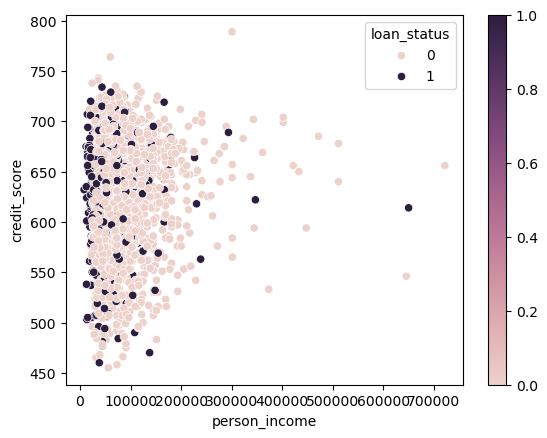

In [112]:
cmap = sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
my_scatter = sns.scatterplot(data=train_sample, x='person_income', y='credit_score', hue=TARGET, hue_norm=sm.norm, palette= cmap, legend=True)
cbar = plt.colorbar(sm, ax = plt.gca())
# cbar.set_label('hue')